   Patient_ID  Age  Gender      Condition                 Procedure   Cost  \
0           1   45  Female  Heart Disease               Angioplasty  15000   
1           2   60    Male       Diabetes           Insulin Therapy   2000   
2           3   32  Female  Fractured Arm          X-Ray and Splint    500   
3           4   75    Male         Stroke    CT Scan and Medication  10000   
4           5   50  Female         Cancer  Surgery and Chemotherapy  25000   

   Length_of_Stay Readmission    Outcome  Satisfaction  
0               5          No  Recovered             4  
1               3         Yes     Stable             3  
2               1          No  Recovered             5  
3               7         Yes     Stable             2  
4              10          No  Recovered             4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ---

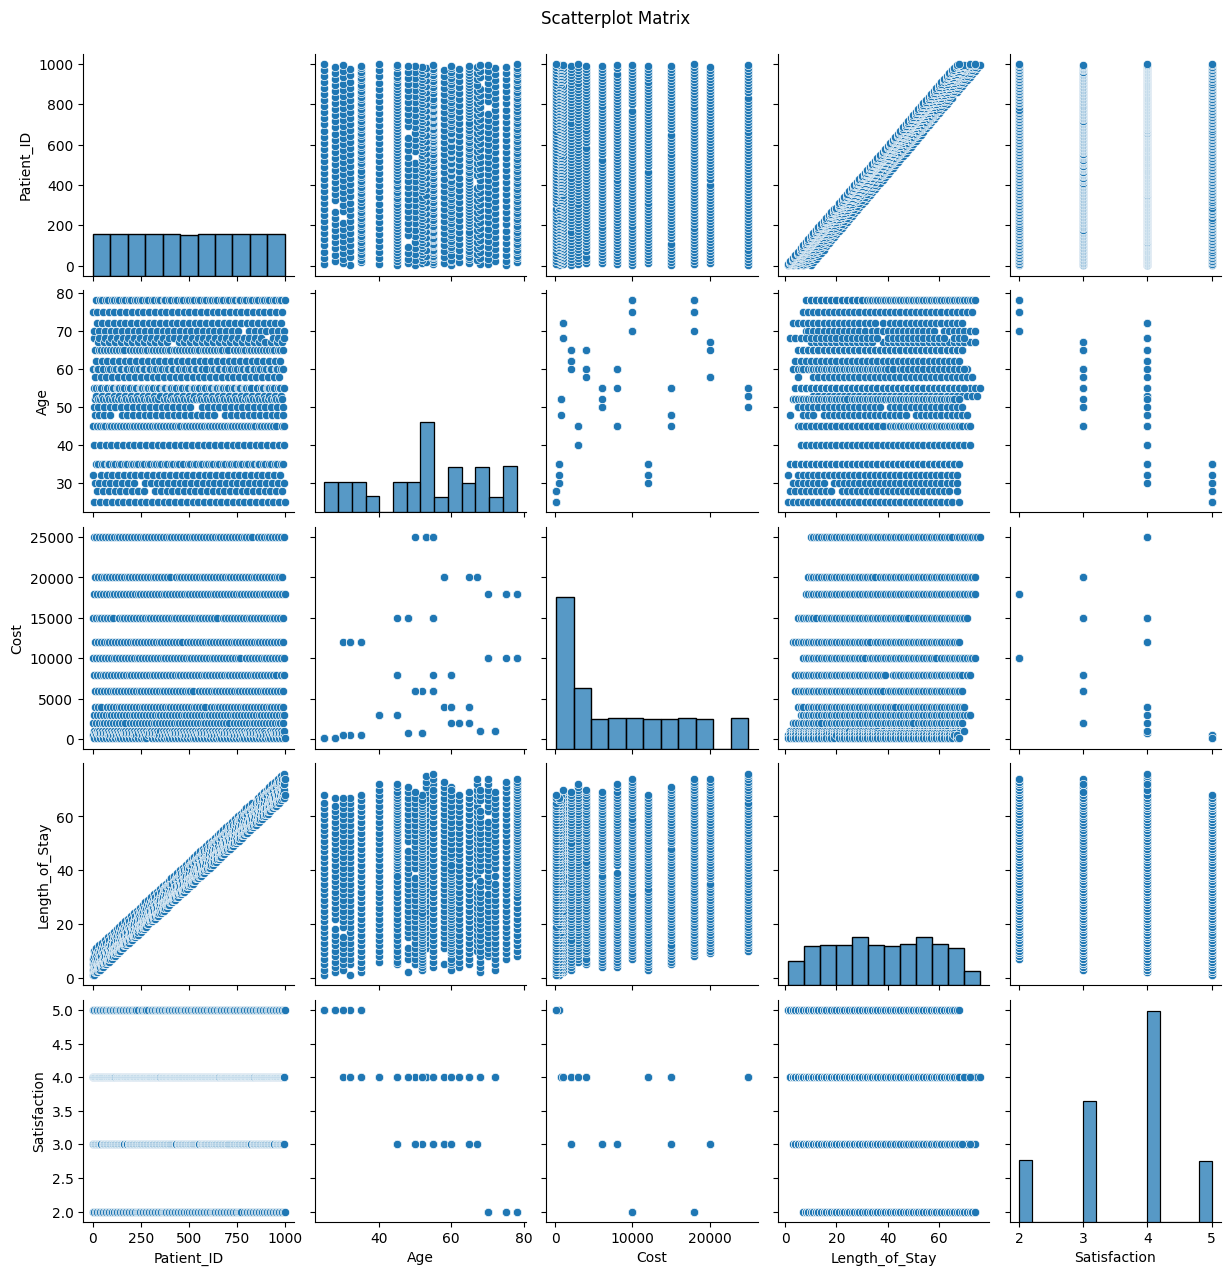

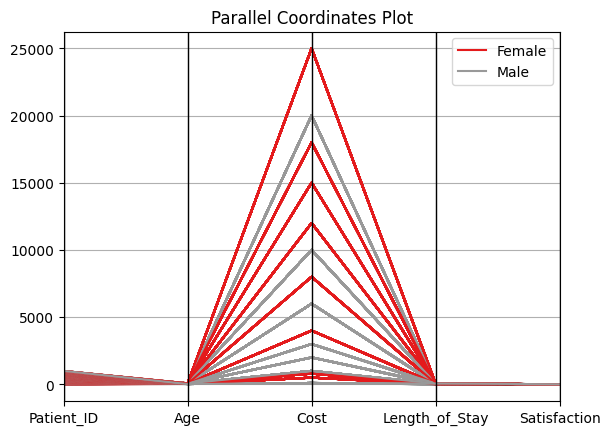

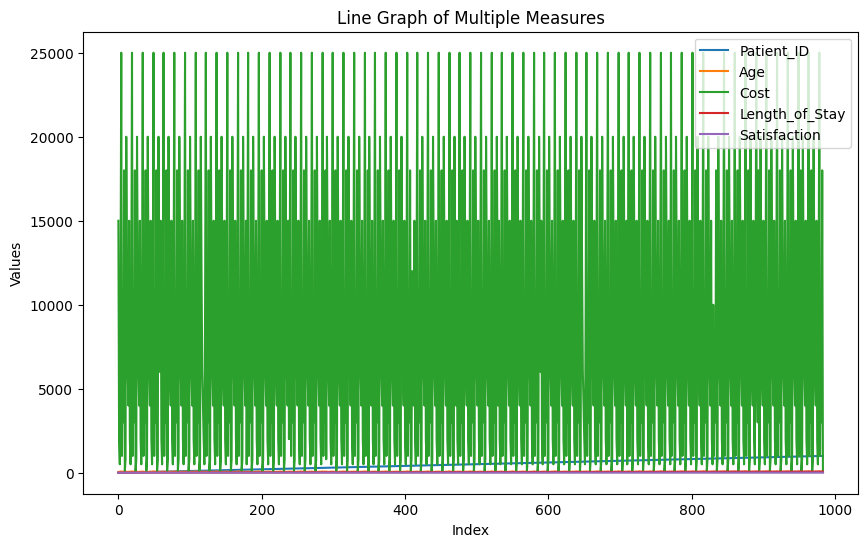

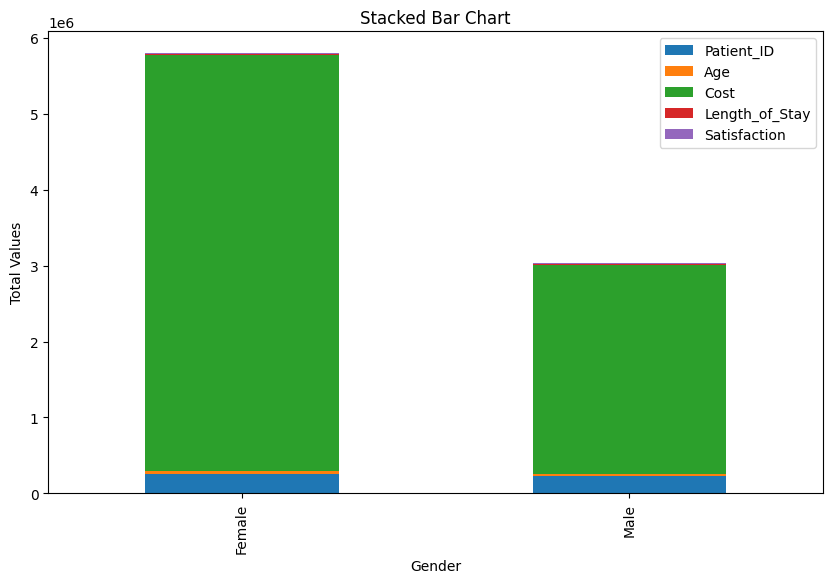

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# 1. Load dataset
df = pd.read_csv("/content/hospital data analysis.csv")

# 2. Quick data check
print(df.head())
print(df.info())

# --------------------
# 3. Scatterplot Matrix
# --------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[num_cols])
plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

# --------------------
# 4. Parallel Coordinates
# --------------------
# Assume 'Department' is a categorical column for grouping (replace with your actual categorical col)
cat_col = df.select_dtypes(include=['object']).columns[0]  # first categorical column
parallel_coordinates(df[[cat_col] + list(num_cols)], class_column=cat_col, colormap=plt.get_cmap("Set1"))
plt.title("Parallel Coordinates Plot")
plt.show()

# --------------------
# 5. Line Graph
# --------------------
plt.figure(figsize=(10,6))
for col in num_cols:
    plt.plot(df.index, df[col], label=col)
plt.title("Line Graph of Multiple Measures")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()

# --------------------
# 6. Stacked Bar Chart
# --------------------
# Example: Group by first categorical column and sum numerical values
grouped = df.groupby(cat_col)[num_cols].sum()
grouped.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Stacked Bar Chart")
plt.ylabel("Total Values")
plt.show()

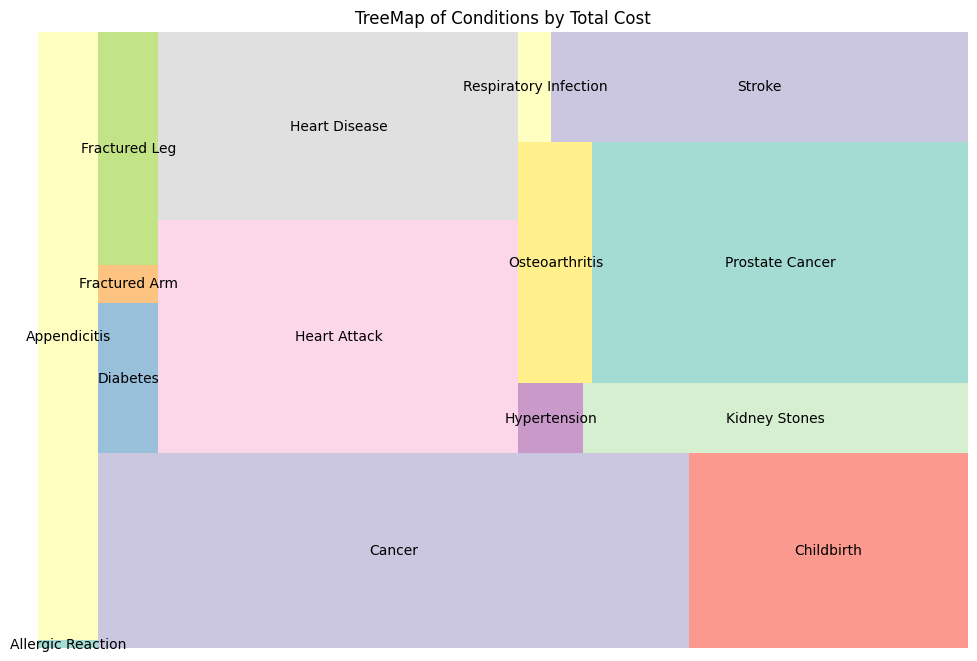

In [ ]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # for treemap

# Load dataset
df = pd.read_csv("/content/hospital data analysis.csv")

# Aggregate cost by condition
treemap_data = df.groupby("Condition")["Cost"].sum().reset_index()

# Construct TreeMap
plt.figure(figsize=(12,8))
squarify.plot(sizes=treemap_data["Cost"],
              label=treemap_data["Condition"],
              alpha=0.8,
              color=plt.cm.Set3.colors)
plt.title("TreeMap of Conditions by Total Cost")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("/content/hospital data analysis.csv")

# Construct Sunburst Chart
fig = px.sunburst(df,
                  path=["Gender", "Condition", "Procedure"], # hierarchy
                  values="Cost",  # size of slices
                  color="Gender",
                  title="Sunburst Chart of Gender → Condition → Procedure (by Cost)")
fig.show()